# Testscript for the MDS correlation analysis
Exploring MDS of stock data correlation matrix for visual analysis

The following script will guide you through the use of the packages for retrieving stock data and visualizing correlations in an abstract 3d cartesian space.

First, import the following scripts and packages.

In [1]:
from corrMDS import corrMDS
import matplotlib.pyplot as plt
import pandas as pd
import stock_data_collection_tools as sdct

plt.style.use('seaborn-darkgrid') #set the plot style 

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

Get the relevant ticker symbols for the german DAX index and retrieve the OHLC time series for the past 10 years. 

In [2]:
sdct.save_dax_tickers()

['ADS',
 'ALV',
 'BAS',
 'BAYN',
 'BEI',
 'BMW',
 'CON',
 '1COV',
 'DAI',
 'DHER',
 'DBK',
 'DB1',
 'DPW',
 'DTE',
 'DWNI',
 'EOAN',
 'FRE',
 'FME',
 'HEI',
 'HEN3',
 'IFX',
 'LIN',
 'MRK',
 'MTX',
 'MUV2',
 'RWE',
 'SAP',
 'SIE',
 'VOW3',
 'VNA']

Retrieve the OHLC time series of the above index for the past 10 years .

In [3]:
sdct.get_dax_from_yahoo()

  0%|                                                                                           | 0/30 [00:00<?, ?it/s]

Already have ADS
Already have ALV
Already have BAS
Already have BAYN
Already have BEI
Already have BMW
Already have CON
Already have 1COV
Already have DAI
Already have DHER
Already have DBK
Already have DB1
Already have DPW
Already have DTE
Already have DWNI
Already have EOAN
Already have FRE
Already have FME
Already have HEI
Already have HEN3
Already have IFX
Already have LIN
Already have MRK
Already have MTX


 80%|████████████████████████████████████████████████████████████████▊                | 24/30 [00:00<00:00, 240.00it/s]

Already have MUV2
Already have RWE
Already have SAP
Already have SIE
Already have VOW3
Already have VNA


100%|█████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 229.02it/s]


Create a joint table of the adjusted closing prices for each stock.

In [4]:
sdct.compile_dax()

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 57.34it/s]


An initial visualization of the correlation matrix over the complete history.

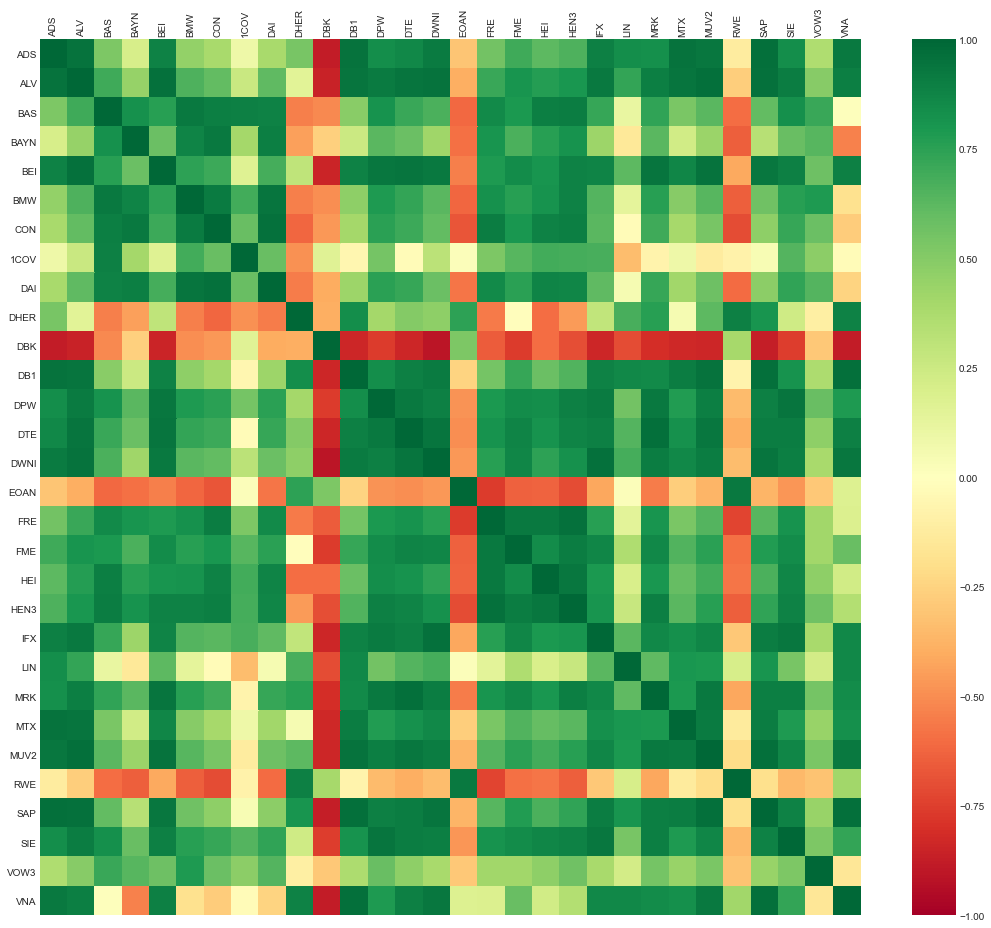

In [5]:
sdct.visualize_data()

Import the joint dataframe of closing prices.

In [2]:
df=pd.read_csv('dax_joined_closes.csv')
df.head()

,Date,ADS,ALV,BAS,BAYN,BEI,BMW,CON,1COV,DAI,...,IFX,LIN,MRK,MTX,MUV2,RWE,SAP,SIE,VOW3,VNA
0,2010-01-04,32.082249,50.085972,27.118727,40.366314,39.762989,21.724628,27.993753,NaN,23.235388,...,3.538174,42.739540,24.958786,31.838680,64.297699,41.063560,27.505367,43.343277,49.426674,NaN
1,2010-01-05,33.094582,50.238697,26.707558,39.629070,39.553238,21.900867,29.745005,NaN,23.043570,...,3.653699,41.743958,24.775070,31.777935,64.416435,40.801579,27.259037,43.369713,48.468807,NaN
2,2010-01-06,32.827965,50.629025,26.876863,39.378597,39.523266,22.239786,29.939539,NaN,23.049753,...,3.604558,42.457962,24.759762,31.668598,64.000839,40.724148,27.743343,43.528622,49.809887,NaN
3,2010-01-07,33.115417,50.046368,26.698494,38.863323,39.125175,22.436354,33.776054,NaN,22.721798,...,3.545071,42.196495,25.280296,31.700987,64.149269,40.551487,28.478159,44.045048,50.384617,NaN
4,2010-01-08,32.994598,49.774837,26.616867,38.519749,37.995079,22.134720,34.400208,NaN,22.854839,...,3.603696,41.784187,25.023851,31.705046,64.030533,40.491917,28.678564,44.323036,50.928646,NaN


Create an instance of the corrMDS class and give the above dataframe as input.

In [3]:
stock_obj = corrMDS(df)

Create the correlation based trajectory in abstract 3d cartesian space with default parameters for the gradient descent. 

In [4]:
stock_obj.MDS_trajectory()

100%|████████████████████████████████████████████████████████████████████████████████| 124/124 [01:17<00:00,  1.60it/s]


Visualize the results in an interactive plot. 

For better visualization change the magic command to %matplotlib qt and view the plot in a seperate window.

<IPython.core.display.Javascript object>


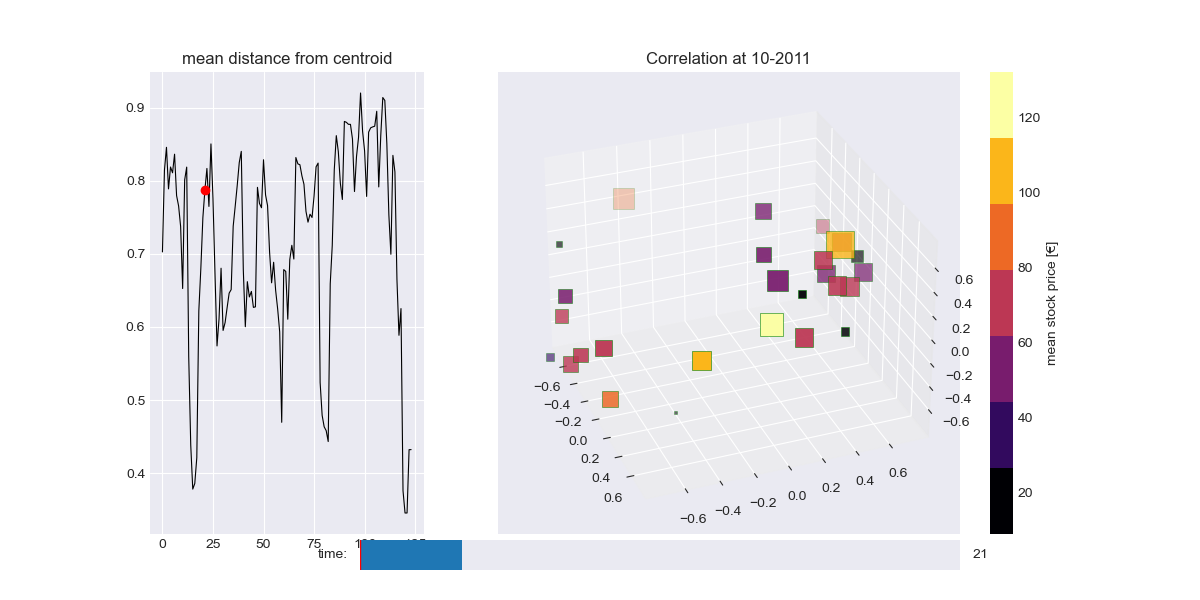

In [6]:
%matplotlib notebook
stock_obj.plot_3d_state()

The left plot shows the mean distance of the configuration in the right plot from its centroid. By using the slider in he bottom, one can follow how the correlation, their standard deviation and mean price change over time.

One can observe, that stocks get heavily correlated with each other during periods of economic crisis, as the overall index tends to shrink. 